In [37]:
# import libraries

# graphing libs
import matplotlib.pyplot as plt
from matplotlib import colors
#%matplotlib inline
#plt.rcParams['figure.figsize'] = [12.0, 8.0]
plt.rcParams['figure.figsize'] = [6.0, 4.0]
import seaborn as sns
sns.set(color_codes=False)
sns.set_style("darkgrid")

# modeling libs
import pandas as pd
import numpy as np
import sys
from scipy import stats, integrate

#text libs
from sklearn.feature_extraction.text import TfidfVectorizer
import re, string

In [8]:
# import datafiles

transit_loc = 'train.csv'
df = pd.read_csv(transit_loc)

In [9]:
# print a preview of the first 5 entries in the dataset

df.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [10]:
# print a preview of the last 5 entries in the dataset

df.tail(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [11]:
# print basic statistics about the dataset

df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# get info on attribute type

df.dtypes

id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object

In [13]:
# get info on dataset size

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [14]:
# create comment length attribute

def add_comment_length(row):
    comment_length = len(row['comment_text'])
    return comment_length

df['comment_length'] = df.apply(add_comment_length, axis=1)
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,65
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,44
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,115
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,472
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,70


In [15]:
# comment length statistics

df['comment_length'].describe()

count    159571.000000
mean        394.073221
std         590.720282
min           6.000000
25%          96.000000
50%         205.000000
75%         435.000000
max        5000.000000
Name: comment_length, dtype: float64

In [16]:
# check to ensure nominal vars are error free

unique_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
attribute_vals = {}
for col in unique_cols:
    attribute_vals[col] = df[col].unique()
    
attribute_vals

{'identity_hate': array([0, 1]),
 'insult': array([0, 1]),
 'obscene': array([0, 1]),
 'severe_toxic': array([0, 1]),
 'threat': array([0, 1]),
 'toxic': array([0, 1])}

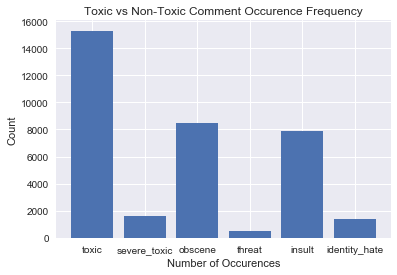

In [17]:
# plot occurance frequency of toxic attributes

unique_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
toxic_freqs = {}
for col in unique_cols:
    toxic_freqs[col] = df[col].value_counts()[1]

data = list(toxic_freqs.values())

fig, ax = plt.subplots()
index = np.arange(len(data))

ax.bar(index, data)
ax.set_xlabel('Number of Occurences')
ax.set_ylabel('Count')
ax.set_title('Toxic vs Non-Toxic Comment Occurence Frequency')
ax.set_xticks(index)
ax.set_xticklabels(list(toxic_freqs.keys()))
plt.show()

In [18]:
# create is_toxic? attribute

def add_is_toxic(row):
    unique_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
    is_toxic = False
    for col in unique_cols:
        if(row[col] == 1):
            is_toxic = True
            break
    return is_toxic

df['is_toxic?'] = df.apply(add_is_toxic, axis=1)
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_length,is_toxic?
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,False
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,False
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,False
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,False
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,False
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,65,False
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,44,True
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,115,False
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,472,False
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,70,False


In [19]:
# create number_of_toxic_occurences attribute

def add_toxic_count(row):
    unique_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
    num_toxic = 0
    for col in unique_cols:
        if(row[col] == 1):
            num_toxic += 1
    return num_toxic

df['toxic_count'] = df.apply(add_toxic_count, axis=1)
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_length,is_toxic?,toxic_count
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,False,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,False,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,False,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,False,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,False,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,65,False,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,44,True,4
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,115,False,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,472,False,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,70,False,0


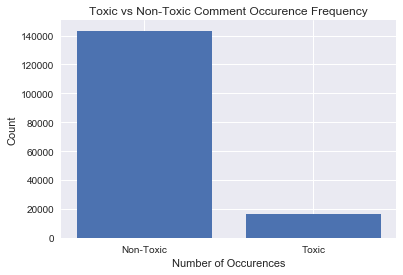

In [20]:
# get frequencies of toxic/non-toxic comments

data = df["is_toxic?"].value_counts()

fig, ax = plt.subplots()
index = np.arange(len(data))

ax.bar(index, data)
ax.set_xlabel('Number of Occurences')
ax.set_ylabel('Count')
ax.set_title('Toxic vs Non-Toxic Comment Occurence Frequency')
ax.set_xticks(index)
ax.set_xticklabels(('Non-Toxic', 'Toxic'))
plt.show()

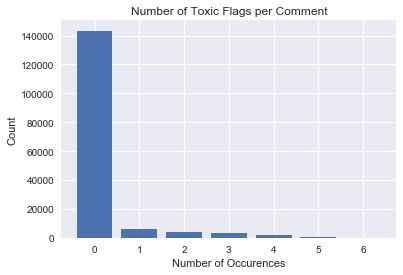

In [21]:
# get frequencies of number of toxic flags

freq_flags = {}
for i, freq in enumerate(df["toxic_count"].value_counts()):
    freq_flags[i] = freq
    
data = list(freq_flags.values())

fig, ax = plt.subplots()
index = np.arange(len(data))

ax.bar(index, data)
ax.set_xlabel('Number of Occurences')
ax.set_ylabel('Count')
ax.set_title('Number of Toxic Flags per Comment')
plt.show()

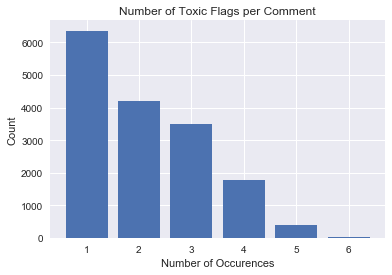

In [22]:
data = list(freq_flags.values())[1:]

fig, ax = plt.subplots()
index = np.arange(len(data))

ax.bar(index, data)
ax.set_xlabel('Number of Occurences')
ax.set_ylabel('Count')
ax.set_title('Number of Toxic Flags per Comment')
ax.set_xticks(index)
ax.set_xticklabels(('1', '2', '3', '4', '5','6'))
plt.show()

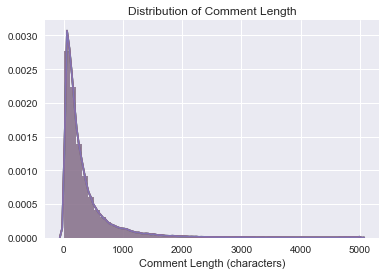

In [34]:
ax = sns.distplot(df["comment_length"])
ax.set_title('Distribution of Comment Length');
ax.set_xlabel('Comment Length (characters)');
plt.show()

In [36]:
# DONT RUN

'''# try to get ride of weird tokens (ie. \n)

from html.parser import HTMLParser
import html

print(df["comment_text"][0])
html.unescape(df["comment_text"][0])
#html_parser.unescape(original_tweet)''';

In [ ]:
# LINK: https://www.kdnuggets.com/2017/12/general-approach-preprocessing-text-data.html

# start here for overview of common approaches to text mining, but don't need to follow exactly. see below steps for
# work that ive done

# LONG BUT V PRACTICAL COLLECTION OF SNIPPETS:

# http://www.nltk.org/book/ch03.html
# https://www.analyticsvidhya.com/blog/2014/11/text-data-cleaning-steps-python/

# GOOD FRAMEWORK TO LOOK INTO (FIRST ONE IS BETTER)
# http://www.nltk.org
# https://pypi.python.org/pypi/textmining/1.0

In [42]:
# Create bag of words sparse matrix with unigrams and bigrams
# BASED ON: https://nlp.stanford.edu/pubs/sidaw12_simple_sentiment.pdf
# from: https://www.kaggle.com/jhoward/nb-svm-strong-linear-baseline

# TODO: predict based on tokenized sparse matrix as an alternate approach to predicting just on engineered features
# ie. two boxes down, we build a whole whack of features to predict on, which cant be combined with this matrix. 
# Both approaches should be explored

re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')

def tokenize(s): return re_tok.sub(r' \1 ', s).split()

# READ THESE DOCS FOR DETAILS ON THIS
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

# THIS IS WHAT THIS DOES
# https://en.wikipedia.org/wiki/Tf–idf
vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1)

tokenized = vec.fit_transform(df['comment_text'])

In [43]:
tokenized

<159571x426005 sparse matrix of type '<class 'numpy.float64'>'
	with 17775104 stored elements in Compressed Sparse Row format>

In [ ]:
# look into character tokenization as further refinement of above process, but see above link for details on predicting
#from: https://www.kaggle.com/tunguz/logistic-regression-with-words-and-char-n-grams/code

In [46]:
## FEATURES ##

## features from kaggle: https://www.kaggle.com/eikedehling/feature-engineering

df['capitals'] = df['comment_text'].apply(lambda comment: sum(1 for c in comment if c.isupper()))
df['caps_vs_length'] = df.apply(lambda row: float(row['capitals'])/float(row['comment_length']),axis=1)
df['num_exclamation_marks'] = df['comment_text'].apply(lambda comment: comment.count('!'))
df['num_question_marks'] = df['comment_text'].apply(lambda comment: comment.count('?'))
df['num_punctuation'] = df['comment_text'].apply(
    lambda comment: sum(comment.count(w) for w in '.,;:'))
df['num_symbols'] = df['comment_text'].apply(
    lambda comment: sum(comment.count(w) for w in '*&$%'))
df['num_words'] = df['comment_text'].apply(lambda comment: len(comment.split()))
df['num_unique_words'] = df['comment_text'].apply(
    lambda comment: len(set(w for w in comment.split())))
df['words_vs_unique'] = df['num_unique_words'] / df['num_words']
df['num_smilies'] = df['comment_text'].apply(
    lambda comment: sum(comment.count(w) for w in (':-)', ':)', ';-)', ';)')))

In [ ]:
# look to this for basic correlation stuff:
# https://www.kaggle.com/djcarlos/exploring-the-toxicity-of-wikipedia-comments